## Hypothesis Testing on Avocado Prices

Context:
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.
Let's try to find it out by Hypothesis Testing, if they can !!!!

### Import libraries and dataset

In [38]:
import numpy as np
from scipy.stats import t, norm, chi2, ttest_rel, ttest_ind, f, binomtest
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
avocado=pd.read_csv('data/avocado.csv')

In [40]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [41]:
avocado.columns = avocado.columns.str.replace(' ', '_').str.replace('[^A-Za-z0-9_]', '', regex=True)

In [42]:
avocado.isnull().sum()

Unnamed_0       0
Date            0
AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

 ### T tests on one sample :

### Q: *"Is average price of an avocado is equal to 1.5 $?"*

#### Null Hypothesis (H₀)

    H_0: mean of Average_price = 1.5$

#### Alternative Hypothesis (H₁)

    H_1: mean of Average_price != 1.5$
---

In [43]:
# Null hypothesis H0: Avg_Price = 1.5
mu0 = 1.5

# Level of significance
a = 0.05

# Number of values
n = len(avocado)

# Sample mean
tmp = avocado.mean()
xbar = tmp['AveragePrice']

# Sample std
tmp = avocado.std(ddof=1)
Sx = tmp['AveragePrice']

print(f'Data set composed of n = {n} values')
print(f'Sample mean = {xbar:.2f}, Sample std = {Sx:.2f}')

Data set composed of n = 18249 values
Sample mean = 1.41, Sample std = 0.40


/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62475/2764341297.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmp = avocado.mean()
/var/folders/dx/p_yf86jj0l337t_4zdrmp1f80000gn/T/ipykernel_62475/2764341297.py:15: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmp = avocado.std(ddof=1)


In [44]:
# Compute value of Test Statistoc (TS)
tbar = (xbar - mu0) / (Sx/np.sqrt(n))

# Compute p-value = 2*P(T>|tbar|)
pvalue = 2*(1 - t.cdf(np.abs(tbar), df=n-1))


In [45]:
# Print results
print(f' TS value     T = {tbar:.3f}')
print(f'        p-value = {pvalue:.9f}')
print(f'sig. lev. alpha = {a:.3f}')

 TS value     T = -31.542
        p-value = 0.000000000
sig. lev. alpha = 0.050


### Hence, we reject the null hypothesis that Average price is 1.5. Average price is not 1.5

#### Q: *"Is average price equal to 1.5 euro?"*
#### A: *"No, at level of significance $\alpha = 0.05$ "*
---

### Q: *"Is average price of HartfordSpringfield region different from that of Houston?"*
---

### Null Hypothesis (H₀)

    H_0: Avg_Price {HartfordSpringfield} = Avg_Price {Houston}

### Alternative Hypothesis (H₁)

    H_1: Avg_Price {HartfordSpringfield} != Avg_Price {Houston}


In [46]:
# Filter data for HartfordSpringfield and Houston regions
hartford_springfield = avocado[avocado['region'] == 'HartfordSpringfield']['AveragePrice']
houston = avocado[avocado['region'] == 'Houston']['AveragePrice']

# Display basic statistics
hartford_springfield.describe(), houston.describe()


(count    338.000000
 mean       1.818639
 std        0.468989
 min        0.860000
 25%        1.390000
 50%        1.800000
 75%        2.270000
 max        2.680000
 Name: AveragePrice, dtype: float64,
 count    338.000000
 mean       1.047929
 std        0.302155
 min        0.510000
 25%        0.790000
 50%        0.980000
 75%        1.260000
 max        1.920000
 Name: AveragePrice, dtype: float64)

In [47]:
# Level of significance
a = 0.05

xbar = hartford_springfield.mean()
Sx = hartford_springfield.std()
m=len(hartford_springfield)

ybar = houston.mean()
Sy = houston.std()
n=len(houston)

In [48]:
print(f'Data set composed of m = {m} hartford_springfield and  n = {n} houston')
print(f'hartford_springfield: Sample mean = {xbar:.2f}, Sample std = {Sx:.2f}')
print(f'houston: Sample mean = {ybar:.2f}, Sample std = {Sy:.2f}')

# pooled sample var
Sp2 = ((n-1)*Sx**2 + (m-1)*Sy**2) / (n+m-2)

# pooled sample std
Sp = np.sqrt(Sp2)

Data set composed of m = 338 hartford_springfield and  n = 338 houston
hartford_springfield: Sample mean = 1.82, Sample std = 0.47
houston: Sample mean = 1.05, Sample std = 0.30


#### Standard deviation differs in our case, but we can assume it not very significant and proceed

In [49]:
# Compute value of Test Statistoc (TS)
tbar2 = (xbar - ybar) / (Sp*np.sqrt( 1/n + 1/m))

# Compute p-value = 2*P(T>|tbar|)
pvalue2 = 2*(1 - t.cdf(np.abs(tbar2), df=m+n-2))

In [50]:
# Print results
print(f' TS value     T = {tbar2:.3f}')
print(f'        p-value = {pvalue2:.3f}')
print(f'sig. lev. alpha = {a:.3f}')


 TS value     T = 25.398
        p-value = 0.000
sig. lev. alpha = 0.050


#### Hence, we reject the hypothesis that price of both places are same at level of significance alpha = 0.05

#### Since, we have seen in our EDA that the price of Avocado is less in Houstan and here we found it's significant also. Maybe Houstan's a good choice !!!!

### Avocado Prices Analysis

In this analysis, we will determine if the average price of avocados in the year 2017 is significantly different from that in the year 2016.Since they say 2017 was the Avocadopocalypse.

Assumption: Average price of Avocado in 2016 and 2017 are dependent

#### Null Hypothesis (H₀)

    H_0: Average_price{2017} = Average_price{2016}

#### Alternative Hypothesis (H₁)

    H_1: Average_price{2017} != Average_price{2016}



In [51]:
# Filter data for the years 2017 and 2015
prices_2017 = avocado[avocado['year'] == 2017]['AveragePrice']
prices_2016 = avocado[avocado['year'] == 2016]['AveragePrice']

# Ensure both series are of the same length by dropping any extra data
min_length = min(len(prices_2017), len(prices_2016))
prices_2017 = prices_2017.iloc[:min_length]
prices_2016 = prices_2016.iloc[:min_length]

# Perform the paired t-test
t_stat, p_value = ttest_rel(prices_2017, prices_2016)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average prices between 2017 and 2016.")
else:
    print("Do not reject the null hypothesis. There is no significant difference in average prices between 2017 and 2016.")

T-statistic: 26.573401661265287
P-value: 1.1690439443978623e-146
Reject the null hypothesis. There is a significant difference in average prices between 2017 and 2016.


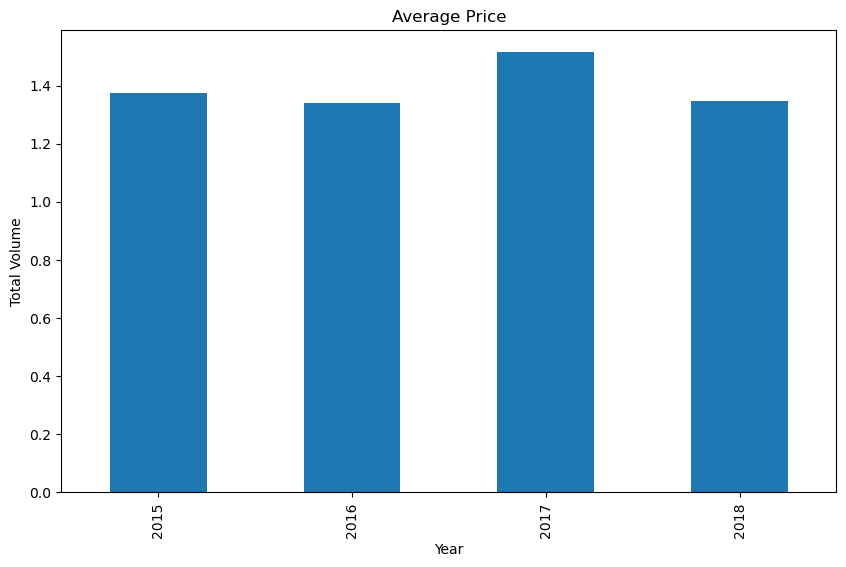

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [52]:
yearly_volume = avocado.groupby('year')['AveragePrice'].mean()
# Plot the total volume of avocados sold each year
plt.figure(figsize=(10, 6))
yearly_volume.plot(kind='bar')
plt.title('Average Price')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

# Display the yearly volume data
yearly_volume

#### Our graph also shows that in year 2017, the price of avocado was significantly higher than 2016. It was indeed Avocadopocalypse !!

### Test on variance: 1 sample 

### Q : We will check if the variance of average price was greater than 0.1^2$ in 2017

### Hypotheses:

#### Null Hypothesis (H₀)

    H_0: Average_price{2017} <= 0.1^2$

#### Alternative Hypothesis (H₁)

    H_1: Average_price{2017} > 0.1^2$


In [53]:
# Filter data for the year 2017
prices_2017 = avocado[avocado['year'] == 2017]['AveragePrice']

In [54]:
# Calculate the sample variance
sample_variance_2017 = prices_2017.var(ddof=1)
n_2017 = len(prices_2017)
print(f'Sample variance of avocado prices in 2017: {sample_variance_2017}')
print(f'Number of observations in 2017: {n_2017}')

Sample variance of avocado prices in 2017: 0.1874072988757621
Number of observations in 2017: 5722


In [55]:
# Null hypothesis H0: sigma2 <= 0.1  H1: sigma2 > 0.1
hypothesized_variance = 0.1

# Compute value of Test Statistic (TS)
c = (n_2017 - 1) * sample_variance_2017 / hypothesized_variance

# Compute p-value = P(chi2>c) with n-1 degrees of freedom
p_value = 1 - chi2.cdf(c, df=n_2017-1)

# Level of significance
alpha = 0.05

print(f'Chi-square statistic: {c}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The variance of avocado prices in 2017 is significantly different from the hypothesized variance.")
else:
    print("Do not reject the null hypothesis. The variance of avocado prices in 2017 is not significantly different from the hypothesized variance.")


Chi-square statistic: 10721.57156868235
P-value: 0.0
Reject the null hypothesis. The variance of avocado prices in 2017 is significantly different from the hypothesized variance.


### Q : We will check if the variance of average price was greater than 0.1^2$ in 2017
### A:  Yes, the average price varied more than 0.1^2& in 2017

## Two-Sample Variance Test (F-Test)

We will perform a two-sample test to compare the variances of avocado prices between conventional and organic avocados in 2017.

#### Null Hypothesis (H₀)

    H_0: Variance of Average_price{Conventional} = Variance of Average_price{Organic}

#### Alternative Hypothesis (H₁)

    H_0: Variance of Average_price{Conventional} != Variance of Average_price{Organic}

In [56]:
# Filter data for the year 2017
avocado_2017 = avocado[avocado['year'] == 2017]

# Separate data for conventional and organic avocados
conventional_prices_2017 = avocado_2017[avocado_2017['type'] == 'conventional']['AveragePrice']
organic_prices_2017 = avocado_2017[avocado_2017['type'] == 'organic']['AveragePrice']

# Display basic statistics
print("Conventional Avocado Prices in 2017:")
print(conventional_prices_2017.describe())
print("\nOrganic Avocado Prices in 2017:")
print(organic_prices_2017.describe())


Conventional Avocado Prices in 2017:
count    2862.000000
mean        1.294888
std         0.302354
min         0.460000
25%         1.070000
50%         1.300000
75%         1.520000
max         2.220000
Name: AveragePrice, dtype: float64

Organic Avocado Prices in 2017:
count    2860.000000
mean        1.735521
std         0.431721
min         0.440000
25%         1.460000
50%         1.720000
75%         2.000000
max         3.170000
Name: AveragePrice, dtype: float64


In [57]:
# Calculate the sample variances
var_conventional = conventional_prices_2017.var(ddof=1)
var_organic = organic_prices_2017.var(ddof=1)

# Number of values
n_conventional = len(conventional_prices_2017)
n_organic = len(organic_prices_2017)

print(f'Conventional: Sample variance = {var_conventional:.4f}')
print(f'Organic: Sample variance = {var_organic:.4f}')

# Compute value of Test Statistic (TS)
f_stat = var_conventional / var_organic

# Compute P(F<f)
p_value = f.cdf(f_stat, n_conventional-1, n_organic-1)

# Compute p-value = 2 * min{P(F<f), 1-P(F<f)) with n-1, m-1 degrees of freedom
p_value = 2 * min(p_value, 1 - p_value)

# Level of significance
alpha = 0.05

print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in variances between conventional and organic avocados in 2017.")
else:
    print("Do not reject the null hypothesis. There is no significant difference in variances between conventional and organic avocados in 2017.")


Conventional: Sample variance = 0.0914
Organic: Sample variance = 0.1864
F-statistic: 0.4904830607067347
P-value: 2.8527134706065737e-79
Reject the null hypothesis. There is a significant difference in variances between conventional and organic avocados in 2017.


### Hence the variance of two types of Avocado are also not same in the  year 2017. 
Year 2017 was not so predictable for the price of Avocado

## One sample test on proportion : Z-test

#### Null Hypothesis (H₀): 
    The proportion of conventional avocados with prices above $1.50 is less than or equal to 0.35.

#### Alternative Hypothesis (H₁): 
    The proportion of conventional avocados with prices above $1.50 is greater than 0.35


In [58]:
# Separate data for conventional avocados
conventional_prices_2017 = avocado_2017[avocado_2017['type'] == 'conventional']

# Calculate the proportion with average prices above $1.50
threshold = 1.50
p0 = 0.35  # hypothesized proportion
a = 0.05  # level of significance

# Number of conventional avocados in 2017
n = len(conventional_prices_2017)

# Number of conventional avocados with prices above $1.50
k = (conventional_prices_2017['AveragePrice'] > threshold).sum()

# Estimated proportion
p_hat = k / n

print(f'{k} conventional avocados have prices above $1.50 out of {n} conventional avocados in the dataset')
print(f'Estimated proportion: p_hat = {p_hat:.3f}')

737 conventional avocados have prices above $1.50 out of 2862 conventional avocados in the dataset
Estimated proportion: p_hat = 0.258


In [59]:
# Perform the binomial test
res = binomtest(k, n, p=p0, alternative='greater')

print(f'TS value     T = {res.statistic}')
print(f'p-value = {res.pvalue:.3f}')
print(f'sig. lev. alpha = {a:.3f}')

# Interpret the results
if res.pvalue < a:
    print("Reject the null hypothesis. The proportion of conventional avocados with prices above $1.50 is significantly greater than 0.35.")
else:
    print(f'Do not reject the null hypothesis at level of significance {a}')

TS value     T = 0.2575122292103424
p-value = 1.000
sig. lev. alpha = 0.050
Do not reject the null hypothesis at level of significance 0.05


### The proportion of conventional avocados with prices above $1.50 is not significantly greater than 0.35. 


### Two-Sample Proportion Test

We will perform a two-sample test to determine if the proportion of conventional avocados with average prices above $1.50$ is significantly different from the proportion of organic avocados with average prices above $1.50$ in 2017.

#### Null Hypothesis (H₀): 
    The proportions of conventional and organic avocados with prices above $1.50 are equal

#### Alternative Hypothesis (H₁): 
    The proportions of conventional and organic avocados with prices above $1.50 are different.


In [60]:
# Separate data for conventional and organic avocados
conventional_prices_2017 = avocado_2017[avocado_2017['type'] == 'conventional']
organic_prices_2017 = avocado_2017[avocado_2017['type'] == 'organic']

# Calculate the proportions with average prices above $1.50
threshold = 1.50

# Number of conventional avocados in 2017
n_conventional = len(conventional_prices_2017)

# Number of organic avocados in 2017
n_organic = len(organic_prices_2017)

# Number of conventional avocados with prices above $1.50
k_conventional = (conventional_prices_2017['AveragePrice'] > threshold).sum()

# Number of organic avocados with prices above $1.50
k_organic = (organic_prices_2017['AveragePrice'] > threshold).sum()

# Estimated proportions
p_conventional = k_conventional / n_conventional
p_organic = k_organic / n_organic

print(f'{k_conventional} conventional avocados have prices above $1.50 out of {n_conventional} conventional avocados in the dataset')
print(f'{k_organic} organic avocados have prices above $1.50 out of {n_organic} organic avocados in the dataset')
print(f'Estimated proportion of conventional avocados: p_conventional = {p_conventional:.3f}')
print(f'Estimated proportion of organic avocados: p_organic = {p_organic:.3f}')


737 conventional avocados have prices above $1.50 out of 2862 conventional avocados in the dataset
2027 organic avocados have prices above $1.50 out of 2860 organic avocados in the dataset
Estimated proportion of conventional avocados: p_conventional = 0.258
Estimated proportion of organic avocados: p_organic = 0.709


In [61]:
# Combined proportion
p_combined = (k_conventional + k_organic) / (n_conventional + n_organic)

# Standard error
standard_error = np.sqrt(p_combined * (1 - p_combined) * (1/n_conventional + 1/n_organic))

# Z-test statistic
z = (p_conventional - p_organic) / standard_error

# P-value
p_value = 2 * (1 - norm.cdf(np.abs(z)))

print(f'Z-statistic: {z}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the proportions of conventional and organic avocados with prices above $1.50 in 2017.")
else:
    print("Do not reject the null hypothesis. There is no significant difference between the proportions of conventional and organic avocados with prices above $1.50 in 2017.")


Z-statistic: -34.15235732969671
P-value: 0.0
Reject the null hypothesis. There is a significant difference between the proportions of conventional and organic avocados with prices above $1.50 in 2017.


#### We can also justify it from EDA that price of organic avocados are comparatively higher than conventional. Hence it makes sense that proportion of organic avocado above 1.50$ will be higher than organic

#### Conclusion and Recommendations:

Our playful exploration through hypothesis testing reveals potential cities where Millennials can fulfill the American dream without forgoing their beloved avocado toast. We've identified locations with significantly lower avocado prices, which could potentially make both lifestyle and homeownership more achievable.

#### Recommendations for Millennials:

**Prioritize cities with lower avocado prices**: Our findings suggest focusing on these areas could help balance avocado consumption with other financial goals like saving for a home.

**Incorporate avocado expenses in budgeting**: Being aware of and managing avocado spending might provide more room for significant investments.

#### Future Work:
Further investigation is needed to robustly link avocado prices with actual home-buying capabilities in these identified cities, giving a more complete picture of Millennial economic challenges and opportunities.